In [1]:
from poisson_solver import*
import matplotlib.pyplot as plt

Libraries fetched!...



Problem

$$
\nabla^2 u = f \quad (x,y)\in [0,1]\times[0,1]\\
u(0,y) = q_1 \quad 0 \leq y\leq 1\\
u(1, y) = q_2 \quad 0\leq y\leq 1\\
\partial_x u(x,0)n_1 + \partial_y u(x,0)n_2 = q_3 \quad 0\leq x \leq 1\\
\partial_y u(x,1)n_1 + \partial_y u(x,1)n_2= q_4 \quad 0\leq x \leq 1
$$

$$
f = -2\sin(x)\sin(y)\\
q_1 = q_2= \sin(x)\sin(y)\\
q3 = q_4 = \cos(x)\sin(y) + \sin(x)\cos(y)
$$

In [48]:
mesh = fd.UnitSquareMesh(200, 200)

In [49]:
model = PoissonSolver(mesh, P = 1)

PoissonSolver initialized!


In [50]:
true_sol = fd.Function(model.V)
true_sol.interpolate(fd.sin(model.x)*fd.sin(model.y))

model.impose_true_sol(true_sol)

In [51]:
bc1 = fd.Function(model.V)
bc1.interpolate(fd.sin(model.x)*fd.sin(model.y))

for i in range(1,5):
    model.impose_DBC(bc1, bc_idx = i)


In [52]:
bc3_x = fd.Function(model.V)
bc3_y = fd.Function(model.V)

bc3_x.interpolate(fd.cos(model.x)*fd.sin(model.y)) 
bc3_y.interpolate(fd.sin(model.x)*fd.cos(model.y))

bc3 = fd.Function(model.W)
bc3.vector().set_local(np.concatenate((bc3_x.vector().get_local(), bc3_y.vector().get_local())))



In [53]:
model.impose_NBC(bc3, bc_idx = 1)
model.impose_NBC(bc3, bc_idx = 2)

In [54]:
model.solve()

In [55]:
diff = fd.Function(model.V)
diff.interpolate(model.true_sol - model.u_sol)
np.abs(np.max(diff.dat.data))

np.float64(0.036622412866173126)

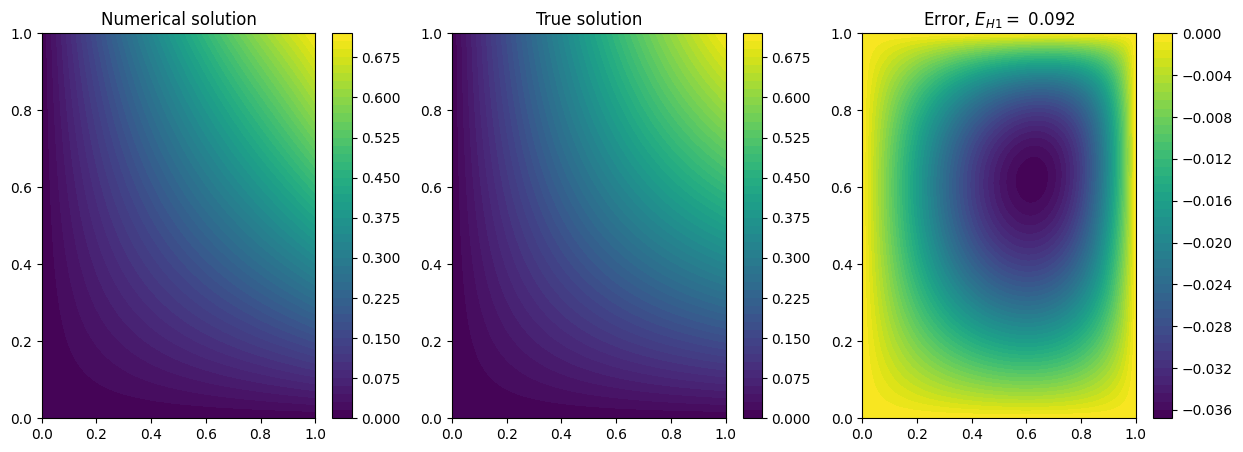

In [57]:
model.plot_results(norm = "H1", levels = 50)

In [13]:
fd.assemble(bc1).dat.data

array([0.        , 0.        , 0.        , ..., 0.7034916 , 0.7034916 ,
       0.70807342], shape=(10201,))